Exercise 1

Innovation: Figure 02
Source: https://time.com/7094914/figure-02/

Exercise 2
Historical Innovation: ASMIO by Honda

ASIMO (Advanced Step in Innovative Mobility) was a humanoid robot developed by Honda, first introduced in 2000. It was designed to assist humans in various tasks, showcasing advancements in robotics, AI, and automation. Similarly, Figure 02 is an advanced humanoid robot that builds upon previous robotic innovations, integrating AI-driven capabilities and enhanced mechanical dexterity for industrial and service applications.

I have chosen this historical data, because both ASIMO and Figure 02 share commonalities in their objectives: improving human-robot interactions, performing assistance-based tasks, and demonstrating robotic advancements. However, Figure 02 likely benefits from modern AI models and more sophisticated machine learning techniques, making it more adaptable and functional in industrial and commercial settings. 

References:

https://global.honda/en/newsroom/news/2000/c001120b-eng.html
https://spectrum.ieee.org/figure-new-humanoid-robot


Exercise 3

https://www.statista.com/statistics/264084/worldwide-sales-of-industrial-robots/ - Worldwide installations of industrial robots from 2004 to 2022

The dataset provides a historical basis to estimate the adoption rate of humanoid robots like ASIMO and extrapolate for Figure 02.


In [21]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

data = pd.read_excel('robots-worldwide-shipments.xlsx')
print(data)


    Year  Shipments
0   2004         97
1   2005        120
2   2006        112
3   2007        114
4   2008        113
5   2009         60
6   2010        121
7   2011        166
8   2012        159
9   2013        178
10  2014        221
11  2015        254
12  2016        304
13  2017        400
14  2018        423
15  2019        387
16  2020        390
17  2021        526
18  2022        553


In [29]:
#Problem 4

def bass_model(t, p, q, M):
    return (M * (p + q) ** 2 * np.exp(-(p + q) * t)) / (p + q * np.exp(-(p + q) * t)) ** 2

data['Year'] -= data['Year'].min()  

params, _ = opt.curve_fit(bass_model, data['Year'], data['Shipments'], p0=[0.03, 0.38, 16000])
p, q, M = params

print(f"Estimated Parameters: p={p:.4f}, q={q:.4f}, M={M:.2f}")

Estimated Parameters: p=0.0022, q=0.1321, M=66.79


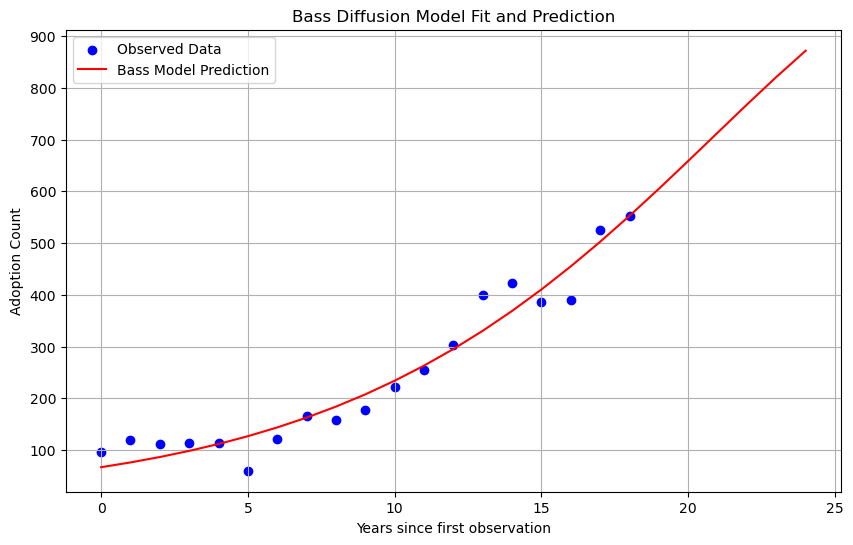

In [41]:
#Problem 5

years = data['Year'].values
shipments = data['Shipments'].values

future_years = np.arange(0, 25)  
future_adoption = bass_model(future_years, p, q, M)

plt.figure(figsize=(10, 6))
plt.scatter(years - years.min(), shipments, label='Observed Data', color='blue') 
plt.plot(future_years, future_adoption, label='Bass Model Prediction', color='red')
plt.xlabel('Years since first observation')
plt.ylabel('Adoption Count')
plt.legend()
plt.title('Bass Diffusion Model Fit and Prediction')
plt.grid()
plt.show()


6) Scope Decision: Global

The diffusion of Figure 02 should be analyzed on a global scale, because industrial automation is a worldwide trend. Companies like BMW (already testing Figure 02) and industries in China, Japan, the U.S., and Germany are driving robotics adoption. Since Figure AI is likely targeting an international market, a global analysis provides a more accurate prediction of adoption. If a country-specific study is needed, the U.S. or China would be the best choices due to their leadership in robotics and automation.

In [45]:
#Problem 7

years = np.arange(0, 25)
cumulative_adopters = bass_model(years, p, q, M) 
new_adopters = np.diff(cumulative_adopters, prepend=0)  

results_df = pd.DataFrame({
    'Year': np.arange(2023, 2023 + len(new_adopters)),
    'New Adopters': new_adopters.astype(int)
})

print(results_df)

    Year  New Adopters
0   2023            66
1   2024             9
2   2025            10
3   2026            11
4   2027            13
5   2028            15
6   2029            16
7   2030            18
8   2031            21
9   2032            23
10  2033            26
11  2034            29
12  2035            32
13  2036            35
14  2037            38
15  2038            41
16  2039            44
17  2040            47
18  2041            50
19  2042            52
20  2043            53
21  2044            54
22  2045            54
23  2046            53
24  2047            50
